In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df = crypto_df[crypto_df['IsTrading']]
new_crypto_df = crypto_df.drop('IsTrading', axis=1)
new_crypto_df


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
newer_crypto_df = new_crypto_df.dropna()
newer_crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
newer_crypto_df = newer_crypto_df[newer_crypto_df['TotalCoinsMined'] > 0]
newer_crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
crypto_v2_df = newer_crypto_df.drop('CoinName', axis=1)
crypto_v2_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [7]:
crypto_v3_df = pd.get_dummies(crypto_v2_df[['Algorithm', 'ProofType']], dummy_na=False)
crypto_v4_df = crypto_v3_df.merge(crypto_v2_df.drop(['Algorithm', 'ProofType'], axis=1), left_index=True, right_index=True)
crypto_v4_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,Unnamed: 0,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,4.199995e+01,42
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,404,1.055185e+09,532000000
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1337,2.927942e+10,314159265359
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BTC,1.792718e+07,21000000
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ETH,1.076842e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ZEPH,2.000000e+09,2000000000
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,GAP,1.493105e+07,250000000
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BDX,9.802226e+08,1400222610
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ZEN,7.296538e+06,21000000


In [8]:
crypto_v4_df['TotalCoinSupply'] = pd.to_numeric(crypto_v4_df.TotalCoinSupply)

In [9]:
crypto_v4_df['TotalCoinsMined'] = (crypto_v4_df.TotalCoinsMined - crypto_v4_df.TotalCoinsMined.mean() ) / crypto_v4_df.TotalCoinsMined.std()
crypto_v4_df['TotalCoinSupply'] = (crypto_v4_df.TotalCoinSupply - crypto_v4_df.TotalCoinSupply.mean() ) / crypto_v4_df.TotalCoinSupply.std()

crypto_v4_df
#df[‘column’] =( df[‘column’] – df[‘column’].mean() ) / df[‘column’].std()



,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,Unnamed: 0,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,-0.116998,-0.152727
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,404,-0.093881,-0.144873
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1337,0.524452,4.485203
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BTC,-0.116605,-0.152417
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ETH,-0.114639,-0.152727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ZEPH,-0.073182,-0.123201
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,GAP,-0.116671,-0.149036
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BDX,-0.095523,-0.132055
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ZEN,-0.116838,-0.152417


In [10]:
crypto_v4_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,Unnamed: 0,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,-0.116998,-0.152727
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,404,-0.093881,-0.144873
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1337,0.524452,4.485203
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BTC,-0.116605,-0.152417
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ETH,-0.114639,-0.152727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ZEPH,-0.073182,-0.123201
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,GAP,-0.116671,-0.149036
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BDX,-0.095523,-0.132055
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ZEN,-0.116838,-0.152417


In [11]:
pca = PCA(n_components=0.90)

crypto_pca = pca.fit_transform(crypto_v4_df.drop('Unnamed: 0', axis=1))

In [12]:
len(crypto_pca.T)

12

In [13]:
crypto_pca = pd.DataFrame(
    data = crypto_pca)


In [14]:
crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.209124,-0.801929,0.172570,-0.672289,-0.028020,-0.027350,0.002161,-0.016857,-0.047424,-0.023041,-0.007850,0.015789
1,-0.187258,-0.804408,0.162158,-0.672940,-0.028778,-0.027213,0.002265,-0.017850,-0.047566,-0.023080,-0.007752,0.015888
2,3.526315,-0.309575,2.912202,0.416903,-0.162546,-0.259260,-0.278430,-0.152428,0.747429,0.360770,-0.233799,-0.070223
3,-0.179959,0.694490,-0.165027,0.239848,-0.278400,-0.614708,0.624121,-0.015064,0.027769,0.009258,-0.026164,-0.026461
4,-0.173087,0.688761,-0.153573,0.131842,-0.212567,-0.104388,-0.242105,0.002792,0.113062,-0.125628,0.058158,-0.129334


In [17]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

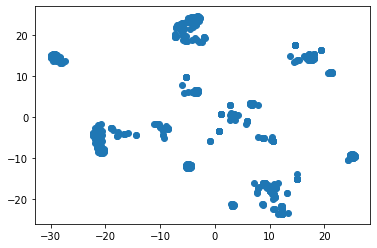

In [22]:
crypto_pca['x'] = tsne_features[:,0]
crypto_pca['y'] = tsne_features[:,1]
plt.scatter(crypto_pca['x'], crypto_pca['y'])
plt.show()


In [25]:
##There are no real distinct features

In [30]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow




,k,inertia
0,1,223444.471994
1,2,123975.191895
2,3,71940.572839
3,4,53116.698685
4,5,33866.848687
5,6,22211.865213
6,7,15773.347584
7,8,10578.165992
8,9,7621.512187
9,10,6412.168684


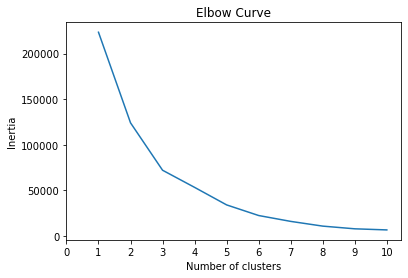

In [31]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()